# README

In [1]:
README = '''
Julian Smoller ~ 6/12/2017

The purpose of this project to is develop and test
the different components required to create a map 
of Citibike stations in NYC. 
'''
print(README)


Julian Smoller ~ 6/12/2017

The purpose of this project to is develop and test
the different components required to create a map 
of Citibike stations in NYC. 



# Libraries

In [2]:

# Custom classes for this project
import CitibikeDataDownloader
import CitibikeDataParser
import GeoCoordinateConverter
import GoogleMapDownloader
import MapMaker

# General
import pickle
from PIL import Image
from matplotlib.pyplot import imshow
import pandas as pd
import numpy as np
import math
import time


% matplotlib inline

In [3]:
def show(im):
    return imshow(np.asarray(im))

# CitibikeDataDownloader

In [4]:
# Initialize
cdd = CitibikeDataDownloader.CitibikeDataDownloader()

In [5]:
# Download
data = cdd.download()
data[:1000]

b'{"executionTime":"2017-06-13 03:07:43 PM","stationBeanList":[{"id":72,"stationName":"W 52 St & 11 Ave","availableDocks":34,"totalDocks":39,"latitude":40.76727216,"longitude":-73.99392888,"statusValue":"In Service","statusKey":1,"availableBikes":3,"stAddress1":"W 52 St & 11 Ave","stAddress2":"","city":"","postalCode":"","location":"","altitude":"","testStation":false,"lastCommunicationTime":"2017-06-13 03:06:34 PM","landMark":""},{"id":79,"stationName":"Franklin St & W Broadway","availableDocks":10,"totalDocks":33,"latitude":40.71911552,"longitude":-74.00666661,"statusValue":"In Service","statusKey":1,"availableBikes":20,"stAddress1":"Franklin St & W Broadway","stAddress2":"","city":"","postalCode":"","location":"","altitude":"","testStation":false,"lastCommunicationTime":"2017-06-13 03:07:28 PM","landMark":""},{"id":82,"stationName":"St James Pl & Pearl St","availableDocks":1,"totalDocks":27,"latitude":40.71117416,"longitude":-74.00016545,"statusValue":"In Service","statusKey":1,"ava

# CitibikeDataParser

In [6]:
# Initialize
cdp = CitibikeDataParser.CitibikeDataParser()
# Parse
cdp.parse(data)
# Execution time
print(cdp.execution_time)
# Geo region
print(cdp.geo_region)
# Stations
print(len(cdp.stations))
cdp.stations.head(2)

2017-06-13 03:07:43 PM
{'lon0': -74.096936600000006, 'lon1': -73.929891100000006, 'lat0': 40.661063371900603, 'lat1': 40.804212999999997}
666


,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,3,34,,72,,2017-06-13 03:06:34 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,20,10,,79,,2017-06-13 03:07:28 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33


In [7]:
# Save
cdp.save()
# Load
cdp = pickle.load(open(cdp.path_default,'rb'))
cdp.geo_region

{'lat0': 40.661063371900603,
 'lat1': 40.804212999999997,
 'lon0': -74.096936600000006,
 'lon1': -73.929891100000006}

# GeoCoordinateConverter

In [8]:
def add_border_to_geo_region(geo_region,border_size=0.1):
    '''Add a border of given size (e.g. 10%) to a geo region'''
    lat_span = geo_region['lat1']-geo_region['lat0']
    lon_span = geo_region['lon1']-geo_region['lon0']
    lat_border = lat_span * border_size
    lon_border = lon_span * border_size
    geo_region_with_border = {}
    geo_region_with_border['lat0'] = geo_region['lat0'] - lat_border
    geo_region_with_border['lat1'] = geo_region['lat1'] + lat_border
    geo_region_with_border['lon0'] = geo_region['lon0'] - lon_border
    geo_region_with_border['lon1'] = geo_region['lon1'] + lon_border
    return geo_region_with_border
geo_region_with_border = add_border_to_geo_region(cdp.geo_region)
print(cdp.geo_region)
print(geo_region_with_border)

{'lon0': -74.096936600000006, 'lon1': -73.929891100000006, 'lat0': 40.661063371900603, 'lat1': 40.804212999999997}
{'lon0': -74.113641150000007, 'lon1': -73.913186550000006, 'lat0': 40.646748409090662, 'lat1': 40.818527962809938}


In [9]:
# Initialize
gcc = GeoCoordinateConverter.GeoCoordinateConverter(geo_region_with_border)

# Calculate total image size
print(gcc.lon_span,'degrees longitude >>',gcc.x,'pixels')
print(gcc.lat_span,'degrees latitude >>',gcc.y,'pixels')

# Convert lon/lat to x/y
my_nyc_apt = {}
my_nyc_apt['lat'] = 40.744419
my_nyc_apt['lon'] = -74.001684
print('NYC apartment:')
print(gcc.lon_to_x(my_nyc_apt['lon']),'x')
print (gcc.lat_to_y(my_nyc_apt['lat']),'y')

0.2004546 degrees longitude >> 9342 pixels
0.171779553719 degrees latitude >> 10565 pixels
NYC apartment:
5217 x
4559 y


# GoogleMapDownloader

In [10]:
# Initialize
gmd = GoogleMapDownloader.GoogleMapDownloader()

In [11]:
# Basic properties
print(gmd.lat_default)
print(gmd.lon_default)
print(gmd.x_pixels_per_image)
print(gmd.y_pixels_per_image)
print(gmd.x_pixels_per_lon)
print(gmd.y_pixels_per_lat)
print(gmd.lon_per_image)
print(gmd.lat_per_image)
print(gmd.path_directory)
print(gmd.path_downloads)
print(gmd.path_default)

40.744419
-74.001684
640
640
46600.0
61500.0
0.013733905579399141
0.01040650406504065
data/GoogleMapDownloader
data/GoogleMapDownloader/downloads
data/GoogleMapDownloader/downloads/default.jpg


In [12]:
# Generate URL
gmd.get_url()

'https://maps.googleapis.com/maps/api/staticmap?center=40.744419,-74.001684&zoom=16&size=1000x1000&maptype=roadmap'

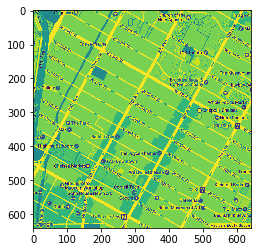

In [13]:
# Download map
path = gmd.download() # returns path: default path if none provided
show(Image.open(path))

# MapMaker

In [14]:
mm = MapMaker.MapMaker(geo_region_with_border)
print(mm.gcc.x,mm.gcc.y)
mm.position_maps()
print(mm.n_images_x,mm.n_images_y)
mm.maps.head()

9342 10565


TypeError: dice() got multiple values for argument 'segment'

In [ ]:
path = mm.make_big_map()
print(path)